# **THE SPARKS FOUNDATION GRIP PROGRAM**
## Data Science and Business Analytics Internship #GRIPAPR21

##**Task 1 : Prediction using Supervised ML**
### Intern : Ketaki Patil

- In this task we predict the percentage of an student based on the no. of study hours. 
- This is a simple linear regression task as it involves just 2 variables.

###**Import Libraries and Read data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###**Visualization of data**

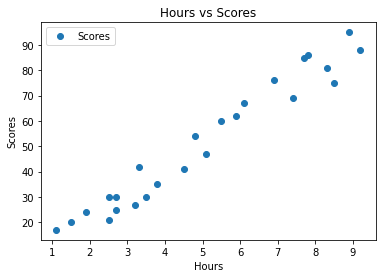

In [5]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

###**Prepare the data**

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

###**Split data as training and testing sets**

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

###**Training Linear Regression model**

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###**Plotting line of regression**

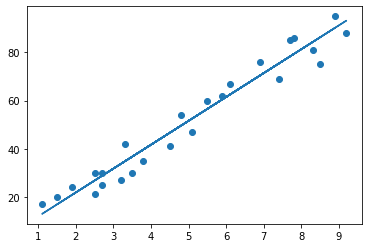

In [9]:
line = regressor.coef_ * X + regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

###**Predicting scores for test data**

In [10]:
y_pred = regressor.predict(X_test)
test_X = list(np.concatenate(X_test).flat)
df = pd.DataFrame({'Testing Data': test_X, 'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Testing Data,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [11]:
print("Training score:", regressor.score(X_train, y_train))
print("Testing score:", regressor.score(X_test, y_test))

Training score: 0.9515510725211553
Testing score: 0.9454906892105354


###**Comaparing Actual Score vs Predicted Score**

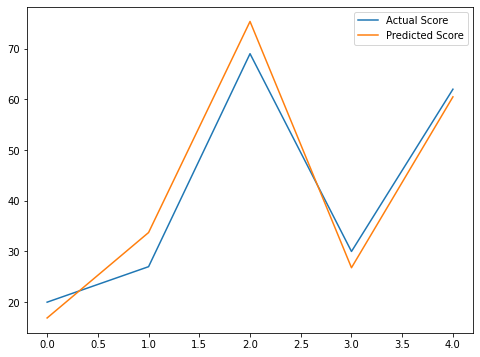

In [12]:
df=df.iloc[:,1:]
df.plot(kind='line', figsize=(8,6))

###**What will be predicted score if a student studies for 9.25 hrs/ day?**
---



In [13]:
#METHOD 1 

hours = [[9.25]]
myscore_pred = regressor.predict(hours)
print("Predicted Score = {}".format(myscore_pred[0]))

Predicted Score = 93.69173248737539


In [14]:
#METHOD 2 

hours = 9.25
pred = regressor.coef_*hours+regressor.intercept_
print("Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Hours = 9.25
Predicted Score = 93.69173248737539


###**Evaluation of model**

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root mean squared Error: 4.647447612100373
